# College Admission Prediction

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
dataset = pd.read_csv("admission_predict.csv")

In [57]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
dataset.drop('Serial No.', axis=1, inplace=True)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [60]:
university_grp = dataset.groupby(by = 'University Rating').mean()

In [61]:
university_grp

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [62]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

# Training dataset

In [1]:
x = dataset.drop(columns=["Chance of Admit"])

NameError: name 'dataset' is not defined

In [64]:
y = dataset["Chance of Admit"]

In [65]:
x.shape()

TypeError: 'tuple' object is not callable

In [66]:
x.shape

(500, 7)

In [67]:
y.shape

(500,)

In [68]:
x = np.array(x)

In [69]:
x = np.array(x)

In [70]:
y = np.array(y)

In [71]:
y = y.reshape(-1,1)

In [72]:
y.shape

(500, 1)

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [74]:
scaling_x = StandardScaler()

In [75]:
x = scaling_x.fit_transform(x)

In [76]:
scaling_y = StandardScaler()
y = scaling_y.fit_transform(y)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)

In [78]:
# Training

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [80]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
accuracy = reg.score(x_test,y_test)
accuracy

0.8180173406819203

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [83]:
ANN = keras.Sequential()
ANN.add(Dense(50, input_dim = 7))
ANN.add(Activation('relu'))
ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(50))
ANN.add(Activation('linear'))
ANN.add(Dense(1))
ANN.compile(loss = 'mse', optimizer = 'adam')
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [84]:
ANN.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [85]:
epochs_hist = ANN.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 23ms/step - loss: 0.6385 - val_loss: 0.1931
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 0.4281 - val_loss: 0.1984
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 0.3284 - val_loss: 0.1665
Epoch 4/100
17/17 [==============================] - 0s 11ms/step - loss: 0.3479 - val_loss: 0.1596
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.3225 - val_loss: 0.1672
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2789 - val_loss: 0.1492
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2277 - val_loss: 0.1536
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2501 - val_loss: 0.1508
Epoch 9/100
17/17 [==============================] - 0s 10ms/step - loss: 0.2672 - val_loss: 0.1595
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2759 - val_loss: 0.1605
Epoc

17/17 [==============================] - 0s 11ms/step - loss: 0.1388 - val_loss: 0.1680
Epoch 83/100
17/17 [==============================] - 0s 11ms/step - loss: 0.1524 - val_loss: 0.1725
Epoch 84/100
17/17 [==============================] - 0s 12ms/step - loss: 0.1342 - val_loss: 0.1746
Epoch 85/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1333 - val_loss: 0.1552
Epoch 86/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1301 - val_loss: 0.1696
Epoch 87/100
17/17 [==============================] - 0s 13ms/step - loss: 0.1498 - val_loss: 0.1694
Epoch 88/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1305 - val_loss: 0.1836
Epoch 89/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1332 - val_loss: 0.1662
Epoch 90/100
17/17 [==============================] - 0s 16ms/step - loss: 0.1268 - val_loss: 0.1640
Epoch 91/100
17/17 [==============================] - 0s 12ms/step - loss: 0.1309 - val_loss: 0.1734
Epoch 9

In [86]:
result = ANN. evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.2199


In [87]:
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

Accuracy : 0.7800999730825424


In [88]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

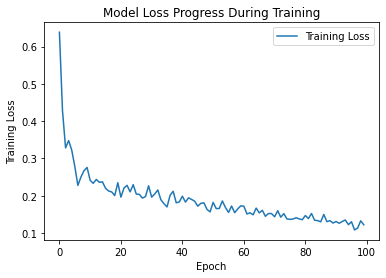

In [89]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [90]:
# Evaluate decision tree

In [91]:
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [92]:
accuracy_decisionTree = decisionTree_model.score(x_test, y_test)
accuracy_decisionTree

0.6999469310008246

In [93]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(x_train, y_train)

C:\Users\acer\AppData\Local\Temp\ipykernel_9540\289138071.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
accuracy_randomforest = randomForest_model.score(x_test, y_test)
accuracy_randomforest

0.7962621634513815

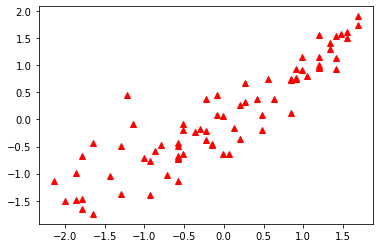

In [95]:
y_pred = reg.predict(x_test)
plt.plot(y_test, y_pred, '^', color='r')

In [96]:
y_predict_orig = scaling_y.inverse_transform(y_pred)
y_test_orig = scaling_y.inverse_transform(y_test)

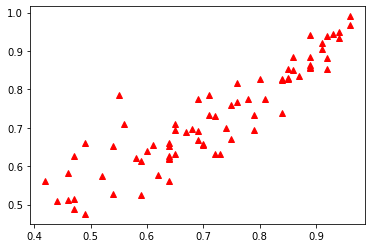

In [97]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')

In [98]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [99]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.064 
MSE = 0.004096715980633969 
MAE = 0.045942157612687204 
R2 = 0.8180173406819202 
Adjusted R2 = 0.7990042270218223


In [100]:
import pickle

In [101]:
s = np.array([320, 110, 1, 5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)


(7,)
(1, 7)


In [102]:
pickle.dump(reg, open('linear_regression_model_sc.pkl', 'wb'))
model = pickle.load(open('linear_regression_model_sc.pkl', 'rb'))
print(model.predict(s))


[[72.75983727]]
